<a href="https://colab.research.google.com/github/JungHwan-Cho/quantitative-analysis/blob/main/finance_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [4]:
from numpy import *

I = 100000

z = random.standard_normal(I)
ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [5]:
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 8.032


# BSM MCS EURO
블랙 숄즈 머튼 모형을 사용한 유러피안 콜 옵션의 몬테카를로 방식 가격 계산

$S_T = S_0 \exp((r - 0.5\sigma^2) T + \sigma \sqrt{T} z)$

In [6]:
import numpy as np

# Parameters
S0 = 100. # 초기의 주가지수
K = 105.  # 행사가
T = 1.0   # 만기까지 남은 시간
r = 0.05  # 무위험 이자율
sigma = 0.2 # 변동성

I = 100000 # 시뮬레이션 횟수

# 가격결정 알고리즘
z = np.random.standard_normal(I)  # 의사 난수
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
# 만기 시의 주가지수
hT = np.maximum(ST - K, 0)  # 만기 시의 내재 가치
C0 = np.exp(-r * T) * np.sum(hT) / I  # 몬테카를로 추정식

# 결과 출력
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 7.983


Google

In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web

In [8]:
yah = web.DataReader('GOOG', data_source='yahoo', start='3/14/2009', end='4/14/2014')
yah.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-08,553.480408,540.127075,541.114380,553.380676,3151228.0,553.380676
2014-04-09,563.822021,551.436035,558.087769,562.595398,3330820.0,562.595398
2014-04-10,563.453064,538.421753,563.453064,539.468872,4036853.0,539.468872
2014-04-11,538.521484,525.088379,531.091858,529.147217,3924846.0,529.147217
2014-04-14,542.610291,528.110046,536.776306,531.061951,2575050.0,531.061951


In [9]:
yah['Log_Ret'] = np.log(yah['Close'] / yah['Close'].shift(1))
yah['Volatility'] = yah['Log_Ret'].rolling(window=252,
                                           center=False).std() * np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e1933198>,
      dtype=object)

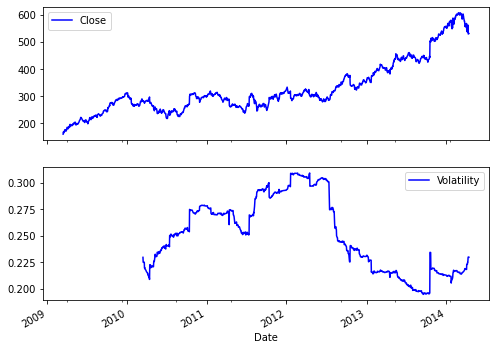

In [12]:
%matplotlib inline
yah[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))

## 성능 개선 가능

In [14]:
loops = 25000000
from math import *
a = range(1, loops)
def f(x):
  return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 10 s per loop


In [16]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

1 loop, best of 3: 1.22 s per loop


In [17]:
# 배열의 메모리 복사를 피하는 방법등을 사용하여 numpy 성능 향상
import numexpr as ne  
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

1 loop, best of 3: 1.11 s per loop


In [18]:
# 병렬처리 기능
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

1 loop, best of 3: 899 ms per loop


In [19]:
%time np.sin(np.arange(10000000))

CPU times: user 256 ms, sys: 920 µs, total: 257 ms
Wall time: 264 ms


array([ 0.        ,  0.84147098,  0.90929743, ..., -0.28830516,
        0.64996899,  0.99066465])

In [20]:
%prun np.sin(np.arange(100000000))